In [1]:
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.cluster import KMeans
import torch
import numpy as np
import pandas as pd
import re
import fastparquet
from itertools import chain
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import os

def find_repo_root(start_path):
    """
    useful general function for finding the (first, closest) repo root so github file paths work the same on different machines 
    """
    current_path = os.path.abspath(start_path)
    
    while True:
        # Check for the existence of the .git directory or other indicators
        if os.path.isdir(os.path.join(current_path, '.git')) or \
           os.path.isfile(os.path.join(current_path, 'README.md')):
            return current_path
        
        parent_path = os.path.dirname(current_path)
        
        # Stop if we reach the root directory
        if parent_path == current_path:
            break
        
        current_path = parent_path

    return None  # Return None if not found

root = find_repo_root(os.getcwd())
root = root.replace('\\', '/')
print(root)


c:/Users/fitsl/Documents/Programming/UVM Programming Classes/PoCS/pocs_project


In [3]:
df = pd.read_csv(f"{root}/Data/2020_trope_data/Scraped_Data/NER_parsed_reviews.csv")
df['reviews_extracted'] = df['reviews_extracted'].apply(ast.literal_eval)
print(len(df['reviews_extracted'].iloc[0]))
df = df.explode('reviews_extracted')
print(len(df['reviews_extracted'].iloc[0]))



96
254


In [4]:
df['reviews_extracted'] = df['reviews_extracted'].astype(str)

In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Sample dataframe (replace with your actual data)
# # Assume the structure is like: df = pd.DataFrame({"movie_id": [1, 1, 1, 2, 2], "review": ["I love this movie", "Amazing plot", "Great acting", "Awesome movie", "Not bad"]})

# # Function to tokenize reviews into words
# def tokenize(review):
#     return set(review.lower().split())  # Use a set to get unique words

# # Initialize an empty list to store results
# new_words_rate = []

# # For each movie, calculate the new words rate for each review
# for i, movie_id in enumerate(df['IMDB_ID'].unique()):
#     print(i, " : ", movie_id)
#     # Filter reviews for the current movie
#     movie_reviews = df[df['IMDB_ID'] == movie_id]  # Assuming 'review_dates' column if needed

#     # Initialize sets for total and unique words so far
#     total_words_so_far = 0
#     unique_words_so_far = set()
    
#     for i, (_, row) in enumerate(movie_reviews.iterrows()):
#         # print(i, row['reviews_extracted'])
#         review_words = tokenize(row['reviews_extracted'])
        
#         # New words encountered in this review
#         new_words_in_this_review = review_words - unique_words_so_far
        
#         # Add to the total count of words
#         total_words_so_far += len(review_words)
        
#         # Update the set of unique words encountered so far
#         unique_words_so_far.update(review_words)
#         try:
#             rate = len(new_words_in_this_review) / len(review_words) 
#         except:
#             rate = 0
        
#         # Store
#         new_words_rate.append({
#             'movie_id': movie_id,
#             'review_count' : i,
#             'word_count' : len(review_words),
#             'genre': row['letterboxd_genres'], 
#             'review': row['reviews_extracted'],
#             'total_words_so_far': total_words_so_far,
#             'unique_words_so_far' : len(unique_words_so_far),
#             'new_words_in_this_review': len(new_words_in_this_review),
#             'new_words_rate': rate  # Rate of new words
#         })

# # Convert results to a DataFrame
# new_words_rate_df = pd.DataFrame(new_words_rate)

# new_words_rate_df.to_parquet(f"{root}/Data/liteweight/heaps_law_data.parquet")


In [6]:
new_words_rate_df = pd.read_parquet(f"{root}/Data/liteweight/heaps_law_data.parquet")

In [7]:
new_words_rate_df = new_words_rate_df.explode('genre')

In [8]:
new_words_rate_df[new_words_rate_df['review_count']==767]

,Unnamed: 0,movie_id,review_count,word_count,genre,review,total_words_so_far,unique_words_so_far,new_words_in_this_review,new_words_rate
48374,20440,tt2544766,767,1,History,荷兰确实没什么好电影，这部单国制作已经算是顶级上乘之作了。黄金时代的荷兰，电影剪辑很棒，最爱...,28912,1877,0,0.0
48375,20440,tt2544766,767,1,Adventure,荷兰确实没什么好电影，这部单国制作已经算是顶级上乘之作了。黄金时代的荷兰，电影剪辑很棒，最爱...,28912,1877,0,0.0
48376,20440,tt2544766,767,1,Drama,荷兰确实没什么好电影，这部单国制作已经算是顶级上乘之作了。黄金时代的荷兰，电影剪辑很棒，最爱...,28912,1877,0,0.0
50998,21320,tt6306064,767,64,Thriller,American Animals was sold out and this was my ...,28448,1678,0,0.0
50999,21320,tt6306064,767,64,Adventure,American Animals was sold out and this was my ...,28448,1678,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2217239,906392,tt0105698,767,66,Action,Imagine being a short redneck dude and someone...,37920,2278,0,0.0
2357918,963460,tt0162650,767,59,Action,This legacy sequel of the originalShaft(and ye...,35776,2075,0,0.0
2357919,963460,tt0162650,767,59,Thriller,This legacy sequel of the originalShaft(and ye...,35776,2075,0,0.0
2357920,963460,tt0162650,767,59,Crime,This legacy sequel of the originalShaft(and ye...,35776,2075,0,0.0


In [9]:
grouped_df = new_words_rate_df.groupby(['genre', 'review_count'])[['total_words_so_far', 'new_words_in_this_review', 'unique_words_so_far', 'word_count', 'new_words_rate']].mean().reset_index()


In [10]:
grouped_df[grouped_df['genre']=='Adventure'].iloc[90:110]

,genre,review_count,total_words_so_far,new_words_in_this_review,unique_words_so_far,word_count,new_words_rate
858,Adventure,90,3669.430745,13.987190,1772.838271,37.944756,0.364772
859,Adventure,91,3708.688604,14.002408,1786.918138,38.049759,0.368315
860,Adventure,92,3748.106024,14.395984,1801.387149,39.265863,0.357175
861,Adventure,93,3787.450965,14.355305,1815.632637,39.245981,0.363623
862,Adventure,94,3826.442926,14.206592,1829.839228,38.991961,0.359887
863,Adventure,95,3867.587289,14.297667,1844.724055,39.653258,0.361999
864,Adventure,96,4113.611111,0.000000,1955.500000,30.166667,0.000000
865,Adventure,97,4154.444444,0.000000,1955.500000,40.833333,0.000000
866,Adventure,98,4196.166667,0.000000,1955.500000,41.722222,0.000000
867,Adventure,99,4232.888889,0.000000,1955.500000,36.722222,0.000000


In [11]:
grouped_df = grouped_df[grouped_df['review_count'] <=95]

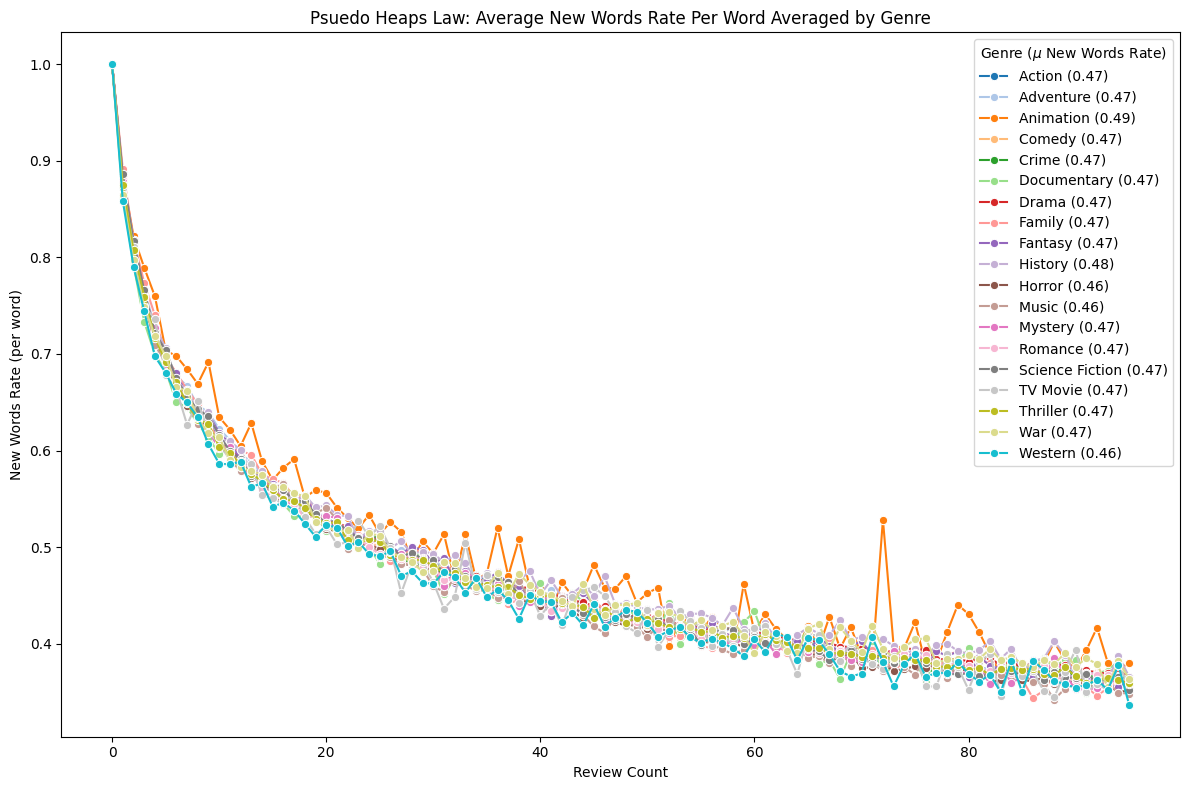

In [12]:

plt.figure(figsize=(12, 8))

sns.lineplot(
    data=grouped_df,
    x='review_count',
    y='new_words_rate',
    hue='genre',
    marker='o',
    palette='tab20'
)

handles, labels = plt.gca().get_legend_handles_labels()
words_rate_max = (
    grouped_df.groupby('genre')['new_words_rate'].mean().to_dict()
)

new_labels = [f"{label} ({words_rate_max[label] :.2f})" for label in labels]
plt.legend(handles=handles, labels=new_labels, title="Genre ($\\mu$ New Words Rate)")

plt.xlabel('Review Count')
plt.ylabel('New Words Rate (per word)')
plt.title('Psuedo Heaps Law: Average New Words Rate Per Word Averaged by Genre')
# plt.xlim(left=0, right=98)
plt.tight_layout()
plt.savefig(f"{root}/Figures/Main/new_words_rate")

plt.show()

In [13]:
grouped_df

,genre,review_count,total_words_so_far,new_words_in_this_review,unique_words_so_far,word_count,new_words_rate
0,Action,0,40.242816,40.242816,40.242816,40.242816,1.000000
1,Action,1,82.149712,36.885797,77.138196,41.897313,0.880227
2,Action,2,125.999519,35.601153,112.778952,43.806824,0.810818
3,Action,3,167.569986,31.786436,144.614719,41.515152,0.760501
4,Action,4,209.509880,30.641446,175.209639,41.976867,0.721647
...,...,...,...,...,...,...,...
11995,Western,91,4308.655602,15.842324,2048.804979,43.514523,0.357224
11996,Western,92,4353.647303,16.224066,2065.029046,44.991701,0.362331
11997,Western,93,4396.174274,15.136929,2080.165975,42.526971,0.352141
11998,Western,94,4439.356846,16.622407,2096.788382,43.182573,0.377579


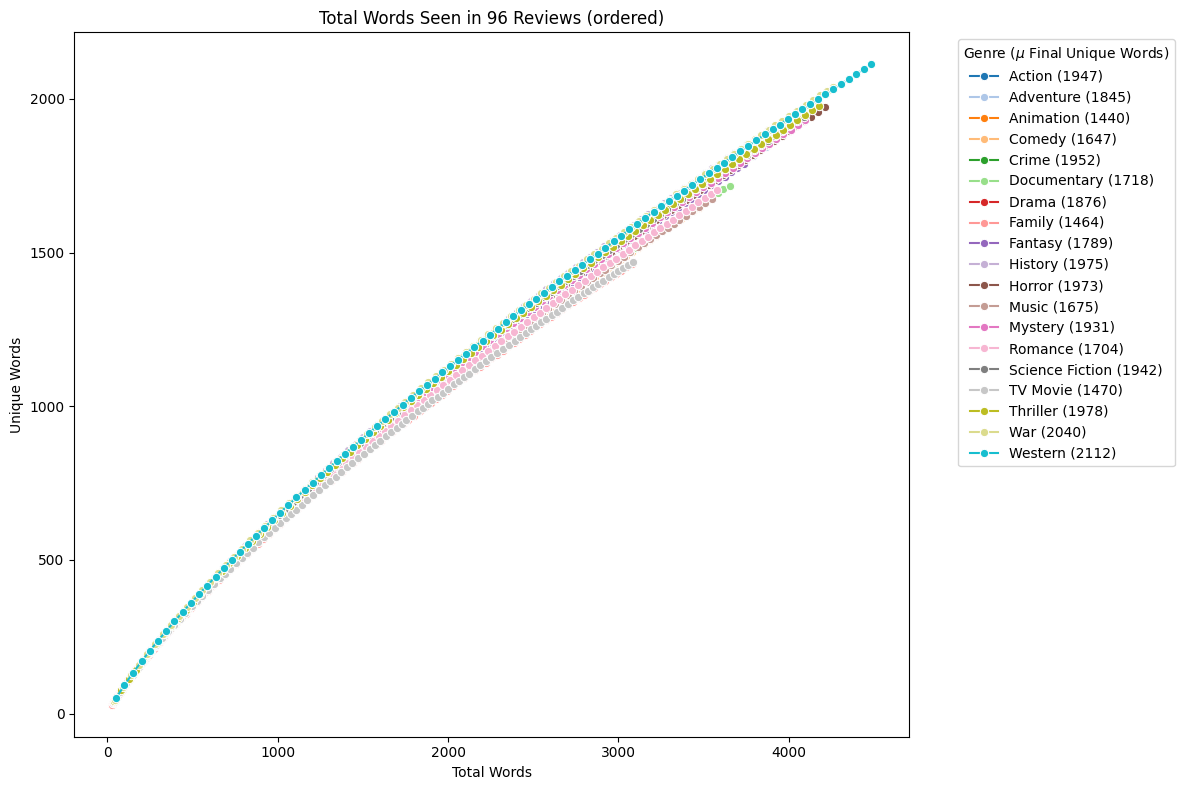

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=grouped_df,
    x='total_words_so_far',
    y='unique_words_so_far',
    hue='genre',
    marker='o',
    palette='tab20'
)

# Modify legend labels to include total unique words
handles, labels = plt.gca().get_legend_handles_labels()

# Calculate total unique words for each genre
unique_words_summary = (
    grouped_df.groupby('genre')['unique_words_so_far'].max().to_dict()
)

# Update legend labels
new_labels = [f"{label} ({unique_words_summary[label]:.0f})" for label in labels]
plt.legend(handles=handles, labels=new_labels, title="Genre ($\\mu$ Final Unique Words)", bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize axis labels and title
plt.ylabel('Unique Words')
plt.xlabel('Total Words')
plt.title('Total Words Seen in 96 Reviews (ordered)')
plt.tight_layout()
plt.savefig(f"{root}/Figures/Main/total_words")

plt.show()
